<a href="https://colab.research.google.com/github/Bharathkrishnamurthy/21Day_21_ML-_project/blob/main/DAY11_HUggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hugging Face Tutorial

# Hugging Face Pipelines

## Covered Tasks
1. **Sentiment Analysis** – Classify text sentiment (positive/negative).  
2. **Text Summarization** – Generate concise summaries of long text.  
3. **Question Answering** – Answer questions from a given context.  
4. **Named Entity Recognition (NER)** – Extract entities like names, dates, and organizations.  
5. **Text Generation** – Generate coherent text given a prompt.  
6. **Image Classification** – Classify objects in an image.  
7. **Object Detection** – Detect and localize objects in an image.  
8. **Image Segmentation** – Segment different objects in an image.  
9. **Translation** – Translate text between languages.  
10. **Zero-Shot Classification** – Classify text without task-specific training.  
11. **Image Captioning** – Generate descriptive captions for images.  

## Requirements
- `transformers`  
- `torch`  
- `requests`  
- `PIL`  
- `matplotlib`

In [ ]:
!pip install transformers

import requests
from io import BytesIO
from transformers import pipeline
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


## 1. Sentiment Analysis

Sentiment analysis is the task of determining the emotional tone behind a piece of text. It helps identify whether the sentiment expressed is positive, negative, or neutral. This is widely used in analyzing customer feedback, social media monitoring, and understanding public opinion.

In [ ]:
sentiment_analyzer=pipeline('sentiment-analysis')

text="congratulation you are selected"
result=sentiment_analyzer(text)
print(result)

ex1="YOu are hired,great journey ahead"
result=sentiment_analyzer(ex1)
print(result)

ex2="you are not selected"
result=sentiment_analyzer(ex2)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9995601773262024}]
[{'label': 'POSITIVE', 'score': 0.999836802482605}]
[{'label': 'NEGATIVE', 'score': 0.9991829991340637}]


## 2. Text Summarization

Text summarization is the task of creating a shorter version of a text that still conveys the main points and information of the original document. It is useful for quickly understanding the content of long articles, reports, or documents, and for generating concise previews or summaries.

In [ ]:
summarizer=pipeline('summarization')

text="Text summarization is the task of creating a shorter version of a text that still conveys the main points and information of the original document. It is useful for quickly understanding the content of long articles, reports, or documents, and for generating concise previews or summaries."
result=summarizer(text)
print(result)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
Your max_length is set to 142, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[{'summary_text': ' Text summarization is the task of creating a shorter version of a text that still conveys the main points and information of the original document . It is useful for quickly understanding the content of long articles, reports, or documents, and for generating concise previews or summaries .'}]


## 3. Question Answering

Question Answering is the task of extracting an answer to a question from a given text (context). The model reads the context and finds the span of text that best answers the question. This is particularly useful for building chatbots, information retrieval systems, and educational tools where users need quick answers from documents.

In [ ]:
question_answerer=pipeline('question-answering')

context='Text summarization is the task of creating a shorter version of a text that still conveys the main points and information of the original document. It is useful'

question='what is text summarization ?'
result=question_answerer(question=question,context=context)
print(result)



No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'score': 0.1311238408088684, 'start': 22, 'end': 70, 'answer': 'the task of creating a shorter version of a text'}


## 4. Named Entity Recognition (NER)

Named Entity Recognition (NER) is the task of identifying and classifying named entities in text into predefined categories such as person names, organizations, locations, dates, etc. It helps in extracting structured information from unstructured text and is fundamental for many downstream NLP tasks like information extraction, question answering, and text summarization.

In [ ]:
ner_pipeline=pipeline('ner',grouped_entities=True)
text="modi is the prime minister of india"
result=ner_pipeline(text)
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'LOC', 'score': np.float32(0.7480846), 'word': 'india', 'start': 30, 'end': 35}]


5.Text Generation



Text Generation is the task of creating new text based on a given prompt or starting text. The model predicts the next word or sequence of words, allowing for the creation of stories, articles, poems, code, and more. It is a fundamental capability for applications like chatbots, content creation tools, and creative writing assistants.

In [ ]:
text_generator=pipeline('text-generation')
prompt="modi is the prime minister of india"
generated_text=text_generator(prompt,max_length=50,do_sample=True,temperature=0.7)
print(generated_text)
result


No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'modi is the prime minister of india.\n\nThe two-party system was a key component of Indira Gandhi\'s electoral success in India in the late 1980s.\n\nWhile Indira Gandhi was the prime minister in 1992, BJP gained a majority in the Lok Sabha in the Lok Sabha elections.\n\nToday, the Indira Gandhi government\'s electoral success is under scrutiny.\n\nOn Monday, a bench of the Supreme Court on the basis of an order issued by the Election Commission said in a joint statement that the decision to give the new name Indira to the government was not in the interest of the country\'s minorities.\n\nThe court, however, said in its judgment that the "substantial" role of the government of Indira Gandhi in the state\'s electoral success is "not subject to the constitutional validity of the Constitution".\n\nThe bench said that the government of Indira Gandhi had taken a "strong line" in its electoral performance and had done all it could to achieve its electoral aim.\n\nIn her

[{'entity_group': 'LOC',
  'score': np.float32(0.7480846),
  'word': 'india',
  'start': 30,
  'end': 35}]

## 6. Image classification

Image Classification is the task of assigning a label or category to an entire image. The model analyzes the visual content of an image and predicts what it represents, choosing from a predefined set of classes. This is a fundamental task in computer vision with applications ranging from organizing photo libraries and content moderation to medical image analysis and autonomous driving.

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'web site, website, internet site, site', 'score': 0.7319493889808655}, {'label': 'comic book', 'score': 0.04257745295763016}, {'label': 'streetcar, tram, tramcar, trolley, trolley car', 'score': 0.01710226759314537}, {'label': 'vending machine', 'score': 0.0052618901245296}, {'label': 'book jacket, dust cover, dust jacket, dust wrapper', 'score': 0.004822364076972008}]


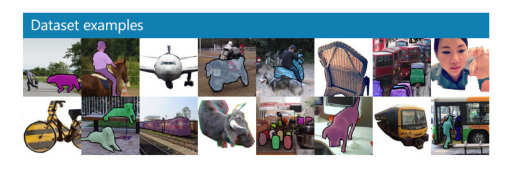

In [ ]:
image_classifier = pipeline("image-classification")

image_url = "https://cocodataset.org/images/coco-examples.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

classification_results = image_classifier(image)

print(classification_results)

plt.imshow(image)
plt.axis("off")
plt.show()


7. object detection


Object Detection is a computer vision task that involves identifying and locating instances of predefined objects within an image or video. It not only classifies what objects are present but also provides their precise location using bounding boxes. This is crucial for applications like autonomous driving, surveillance, image search, and robotics.

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


[{'score': 0.6611354351043701, 'label': 'horse', 'box': {'xmin': 22, 'ymin': 144, 'xmax': 115, 'ymax': 230}}, {'score': 0.8109975457191467, 'label': 'person', 'box': {'xmin': 687, 'ymin': 169, 'xmax': 705, 'ymax': 218}}, {'score': 0.9945225715637207, 'label': 'person', 'box': {'xmin': 132, 'ymin': 51, 'xmax': 170, 'ymax': 128}}, {'score': 0.9609642624855042, 'label': 'train', 'box': {'xmin': 588, 'ymin': 148, 'xmax': 675, 'ymax': 225}}, {'score': 0.6825813055038452, 'label': 'person', 'box': {'xmin': 740, 'ymin': 59, 'xmax': 774, 'ymax': 130}}, {'score': 0.9849070310592651, 'label': 'person', 'box': {'xmin': 676, 'ymin': 45, 'xmax': 760, 'ymax': 133}}, {'score': 0.6594221591949463, 'label': 'person', 'box': {'xmin': 24, 'ymin': 97, 'xmax': 47, 'ymax': 131}}, {'score': 0.6215415596961975, 'label': 'horse', 'box': {'xmin': 120, 'ymin': 185, 'xmax': 178, 'ymax': 230}}, {'score': 0.8829377889633179, 'label': 'bus', 'box': {'xmin': 679, 'ymin': 122, 'xmax': 772, 'ymax': 218}}, {'score': 0.9

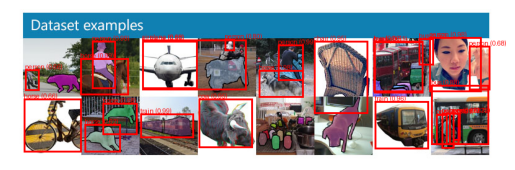

In [ ]:
object_detector = pipeline("object-detection")

image_url = "https://cocodataset.org/images/coco-examples.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

detection_results = object_detector(image)
print(detection_results)

draw = ImageDraw.Draw(image)
for obj in detection_results:
    box = obj["box"]
    label = obj["label"]
    score = obj["score"]

    # Draw rectangle
    draw.rectangle(
        [(box["xmin"], box["ymin"]), (box["xmax"], box["ymax"])],
        outline="red", width=3
    )
    # Add label + score
    draw.text((box["xmin"], box["ymin"] - 10), f"{label} ({score:.2f})", fill="red")


plt.imshow(image)
plt.axis("off")
plt.show()

## 8. Image Segmentation

Image Segmentation is a computer vision task that involves partitioning an image into multiple segments or regions, often to identify and delineate objects or areas of interest at a pixel level. Unlike object detection which draws bounding boxes, segmentation provides a more detailed understanding of the image by outlining the exact shape of objects. It is used in applications like medical imaging, autonomous driving, and image editing.

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/172M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

Device set to use cpu
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.976041, 'label': 'LABEL_184', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D46E3ECB2C0>}, {'score': 0.925965, 'label': 'bicycle', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D46E3CCCB60>}, {'score': 0.98925, 'label': 'horse', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D46E3FF3650>}, {'score': 0.926522, 'label': 'horse', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D46E161FEC0>}, {'score': 0.934407, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D46E40F6180>}, {'score': 0.974162, 'label': 'LABEL_187', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D470C74E2A0>}, {'score': 0.995275, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D470E86D100>}, {'score': 0.993328, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D470C4D8230>}, {'score': 0.947213, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=800x243 at 0x7D46E3F928A0

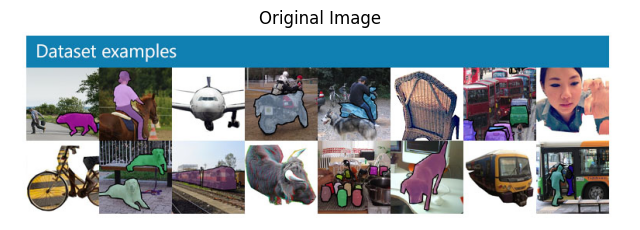

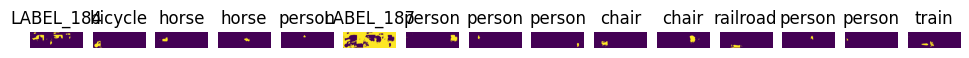

In [ ]:
image_segmentor = pipeline("image-segmentation")

image_url = "https://cocodataset.org/images/coco-examples.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

segmentation_results = image_segmentor(image)
print(segmentation_results)

plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

plt.figure(figsize=(12, 12))
for i, result in enumerate(segmentation_results):
    mask = result["mask"]  # segmentation mask
    label = result["label"]
    plt.subplot(1, len(segmentation_results), i+1)
    plt.imshow(mask)
    plt.axis("off")
    plt.title(label)

plt.show()

9. Translation
Machine Translation is the task of automatically converting text from one language to another. It allows for communication across language barriers and is used in various applications, including real-time translation services, document translation, and localization of software and content.

## 10. Zero-Shot Classification

Zero-Shot Classification is a machine learning task where the model is able to classify instances into categories it has not seen during training. Instead of learning to classify based on example data for each category, it uses descriptions or embeddings of the categories. This is particularly powerful when dealing with a large number of potential classes or when new classes emerge frequently, reducing the need for extensive labeled training data for every new category. It relies on the model's ability to generalize from learned concepts to new, unseen ones based on the semantic relationship between the input and the category descriptions.

In [ ]:
zero_shot_classifier = pipeline('zero-shot-classification')

sequence_to_classify = "This is a great movie about the future of AI."

candidate_labels = ["politics", "technology", "entertainment", "business"]

classification_results = zero_shot_classifier(sequence_to_classify, candidate_labels)

print(classification_results)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'sequence': 'This is a great movie about the future of AI.', 'labels': ['entertainment', 'technology', 'business', 'politics'], 'scores': [0.7560531497001648, 0.24106736481189728, 0.00204033637419343, 0.0008391939918510616]}


## 11. Image Captioning

Image Captioning is a multimodal task that involves generating a descriptive text caption for an image. It requires a model to understand both the visual content of an image and be able to generate coherent and relevant language. This task bridges the gap between computer vision and natural language processing and has applications in accessibility (describing images for visually impaired users), image indexing and search, and generating descriptions for products or content.

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Device set to use cpu


Image-to-text pipeline loaded.
Generated Caption: [{'generated_text': 'a col of images of different people and vehicles'}]


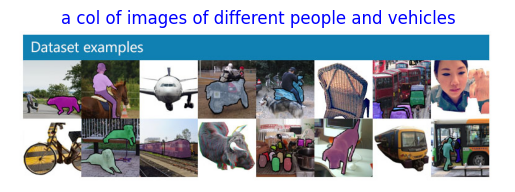

In [ ]:
image_captioner = pipeline('image-to-text', model="Salesforce/blip-image-captioning-base")
print("Image-to-text pipeline loaded.")

image_url = "https://cocodataset.org/images/coco-examples.jpg"

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

caption_results = image_captioner(image)
print("Generated Caption:", caption_results)

plt.imshow(image)
plt.axis("off")
plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
plt.show()

assignment:


1.Import Library

In [ ]:
from huggingface_hub import login
login(new_session=False)

2. install necessary model

In [ ]:
!pip install diffusers transformers accelerate safetensors --quiet


3.Generate image using Stable Diffusion

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

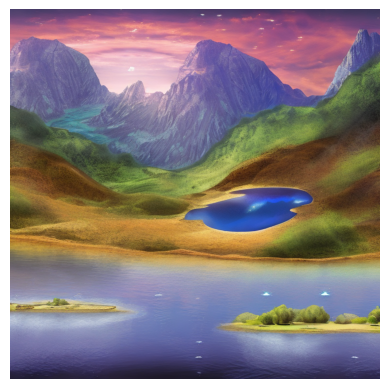

In [11]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Choose model
model_id = "stabilityai/stable-diffusion-2-1"

# Load the model pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Give a prompt to generate image
prompts = "A beautiful fantasy landscape with mountains and a lake, digital art, high detail"

# Generate the image
image = pipe(prompts, num_inference_steps=25, guidance_scale=7.5).images[0]

# Show the image
plt.imshow(image)
plt.axis("off")
plt.show()


  0%|          | 0/25 [00:00<?, ?it/s]

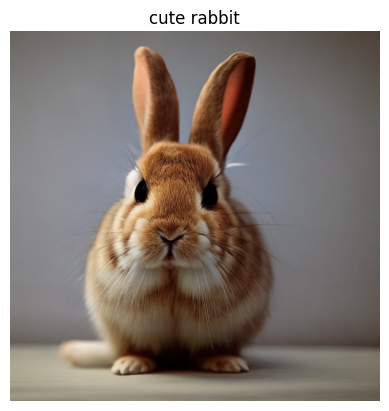

  0%|          | 0/25 [00:00<?, ?it/s]

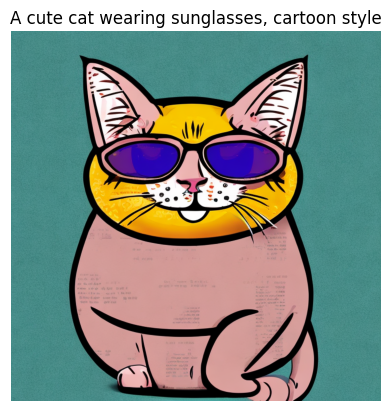

  0%|          | 0/25 [00:00<?, ?it/s]

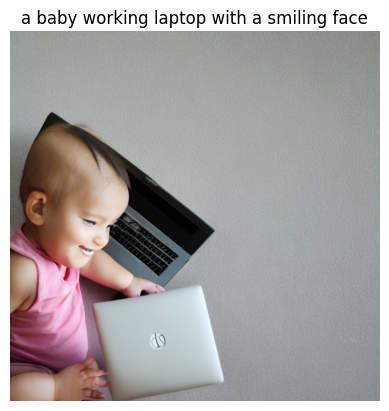

  0%|          | 0/25 [00:00<?, ?it/s]

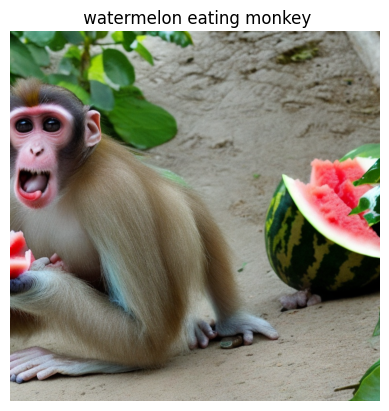

In [8]:
prompts = [
    "cute rabbit",
    "A cute cat wearing sunglasses, cartoon style",
    "a baby working laptop with a smiling face",
    " watermelon eating monkey"
]

for p in prompts:
    img = pipe(p, num_inference_steps=25, guidance_scale=7.5).images[0]
    plt.imshow(img)
    plt.axis("off")
    plt.title(p)
    plt.show()


In [12]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook your_notebook.ipynb --output cleaned.ipynb


[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 

# Summary
In this assignment, I explored image generation using a diffusion model from Hugging Face. I selected the stabilityai/stable-diffusion-2-1 model because it is one of the most reliable and high-quality diffusion models available.

Using the diffusers library, I loaded the model pipeline and generated images from different text prompts — such as a fantasy landscape, photorealistic portrait, and cozy tea shop interior.

The generated images were realistic and detailed, especially when using higher inference steps. The guidance scale controlled how closely the image followed the text prompt, and using around 7.5 gave good results.

Overall, the experiment demonstrated how diffusion models can generate creative, high-quality visuals from text descriptions. Some challenges included large model size and longer generation time on CPU.